<a href="https://colab.research.google.com/github/carolss-dev/LADS/blob/main/ProjetoLADS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este é o primeiro projeto que realizo com análise de dados.

O objetivo dele é ver as incidências de focos de incendio pela América do Sul - desastres naturais - durante os peréiodos entre 2000 e 2025 (anos).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()


Saving public_emdat_custom_request_2025-05-17_a5d2cf0d-21e9-4481-998d-24f609650d50.xlsx to public_emdat_custom_request_2025-05-17_a5d2cf0d-21e9-4481-998d-24f609650d50.xlsx


In [4]:
import pandas as pd

df = pd.read_excel("public_emdat_custom_request_2025-05-17_a5d2cf0d-21e9-4481-998d-24f609650d50.xlsx")
df.head(20)


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0008-GTM,No,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Pacaya,GTM,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":64911,""adm2_name"":""San Vicente P...",2014-07-28,2023-09-25
1,2000-0019-BRA,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,BRA,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":8467,""adm2_name"":""Pirangucu""},{""...",2005-07-08,2023-09-25
2,2000-0081-COL,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,USGS:usp000a373,NaN,COL,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":13795,""adm2_name"":""Jurado""},{""ad...",2008-05-08,2023-09-25
3,2000-0098-COL,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,COL,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":961,""adm1_name"":""Santander""},{""a...",2003-07-01,2023-09-25
4,2000-0116-ARG,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,ARG,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":431,""adm1_name"":""Catamarca""},{""a...",2005-09-16,2023-09-25
5,2000-0129-PER,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,PER,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":24086,""adm2_name"":""Angaraes""}]",2005-02-03,2023-09-25
6,2000-0130-BOL,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,BOL,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":40444,""adm1_name"":""Chuquisaca""},...",2005-02-09,2023-09-25
7,2000-0204-ECU,No,nat-bio-epi-par,Natural,Biological,Epidemic,Parasitic disease,NaN,NaN,ECU,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2003-07-01,2023-09-25
8,2000-0205-ECU,No,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,NaN,Dengue fever,ECU,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2003-07-01,2023-09-25
9,2000-0206-ECU,No,nat-hyd-mmw-lan,Natural,Hydrological,Mass movement (wet),Landslide (wet),NaN,NaN,ECU,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":15512,""adm2_name"":""Quito""}]",2003-07-01,2023-09-25


In [5]:
print(df.columns)

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     1696 non-null   object 
 1   Historic                                   1696 non-null   object 
 2   Classification Key                         1696 non-null   object 
 3   Disaster Group                             1696 non-null   object 
 4   Disaster Subgroup                          1696 non-null   object 
 5   Disaster Type                              1696 non-null   object 
 6   Disaster Subtype                           1696 non-null   object 
 7   External IDs                               533 non-null    object 
 8   Event Name                                 501 non-null    object 
 9   ISO                                        1696 non-null   object 
 10  Country                 

In [7]:
df['Country'].unique()
s_country = df['Country'].value_counts()
s_country.name = 'Total de ocorrências'
s_country

,Total de ocorrências
Country,
Mexico,164
Brazil,163
Colombia,136
Peru,115
Haiti,97
Guatemala,90
Argentina,85
Bolivia (Plurinational State of),75
Chile,67


In [8]:
total_country = s_country.sum()
s_percent = round(s_country * 100 / total_country, 1)
s_percent

,Total de ocorrências
Country,
Mexico,9.7
Brazil,9.6
Colombia,8.0
Peru,6.8
Haiti,5.7
Guatemala,5.3
Argentina,5.0
Bolivia (Plurinational State of),4.4
Chile,4.0


In [9]:
dados_country = pd.DataFrame(s_country)
dados_country['Percentual'] = s_percent
dados_country

,Total de ocorrências,Percentual
Country,,
Mexico,164,9.7
Brazil,163,9.6
Colombia,136,8.0
Peru,115,6.8
Haiti,97,5.7
Guatemala,90,5.3
Argentina,85,5.0
Bolivia (Plurinational State of),75,4.4
Chile,67,4.0


In [10]:
top_4_abs = round(dados_country['Total de ocorrências'].iloc[0:4].sum(axis=0))
top_4_percent = round(dados_country['Percentual'].iloc[0:4].sum(axis=0))
print("Os paíse México, Brasil, Colombia e Peru tiveram o total de {} ocorrências,".format(top_4_abs)
      + "\nrepresentando aproximadamente {}% dos acidentes ambientais na América do Sul.".format(top_4_percent))

Os paíse México, Brasil, Colombia e Peru tiveram o total de 578 ocorrências,
representando aproximadamente 34% dos acidentes ambientais na América do Sul.


<ipython-input-12-df00e9d148d8>:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


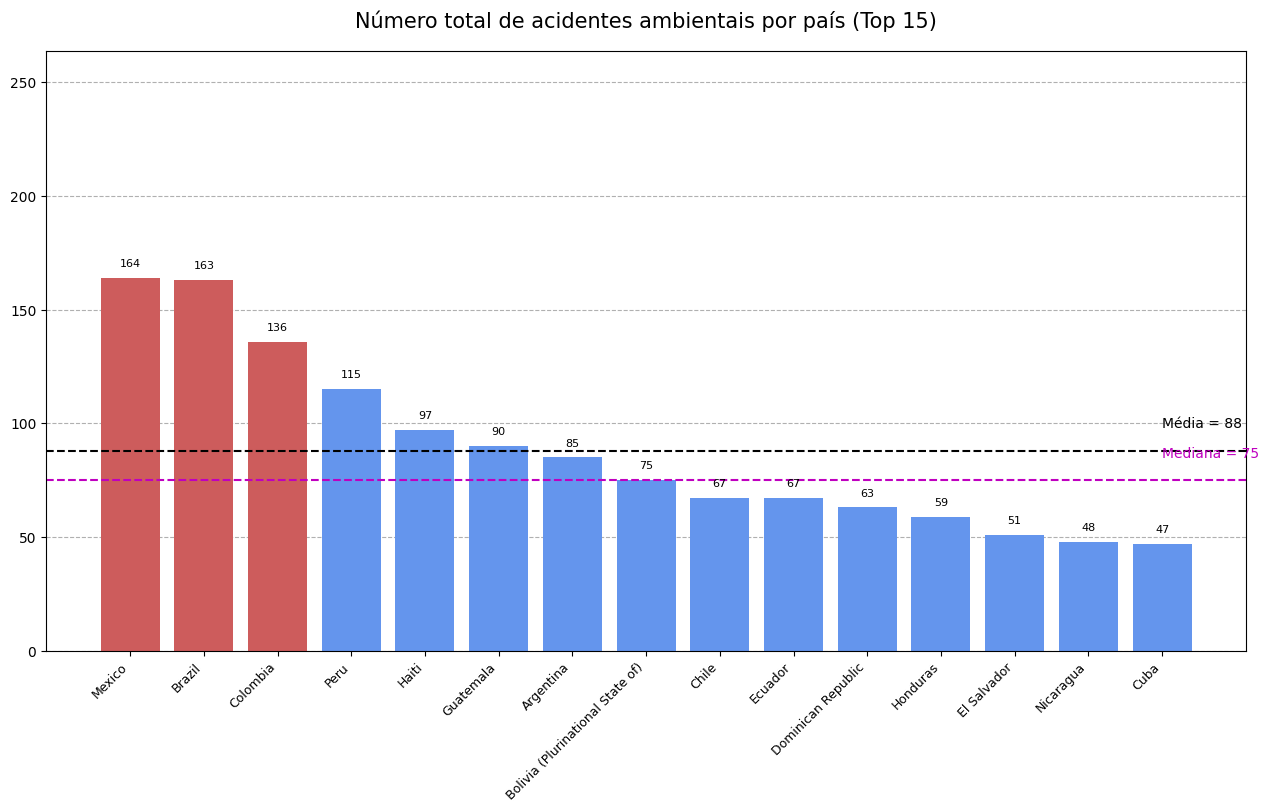

In [12]:
import matplotlib.pyplot as plt

#top 15 países com mais ocorrências
top_n = 15
dados_top = dados_country.sort_values('Total de ocorrências', ascending=False).head(top_n)

#cores (vermelho para os 3 maiores, azul para os demais)
cores = ['indianred'] * 3 + ['cornflowerblue'] * (top_n - 3)

#média e mediana
media = round(dados_top['Total de ocorrências'].mean())
mediana = round(dados_top['Total de ocorrências'].median())

#gráficos
fig = plt.figure(figsize=(12, 6))
eixo = fig.add_axes([0, 0, 1, 1])
#barras
eixo.bar(dados_top.index, dados_top['Total de ocorrências'], color=cores, zorder=2)
#título
eixo.set_title('Número total de acidentes ambientais por país (Top 15)', fontsize=15, pad=17)

#eixo x
eixo.set_xticks(range(len(dados_top.index)))
eixo.set_xticklabels(dados_top.index, fontsize=9, rotation=45, ha='right')

#grade horizontal
eixo.grid(True, axis='y', linestyle='--', lw=0.8, zorder=1)

#eixo y
eixo.set_ylim(0, dados_top['Total de ocorrências'].max() + 100)

#linhas de méd e mediana
eixo.axhline(media, linestyle='--', color='k')
eixo.annotate(f'Média = {media}', xy=(top_n - 1, media + 10), fontsize=10, color='k')

eixo.axhline(mediana, linestyle='--', color='m')
eixo.annotate(f'Mediana = {mediana}', xy=(top_n - 1, mediana + 10), fontsize=10, color='m')

#valores no topo das barras
for i, v in enumerate(dados_top['Total de ocorrências']):
    eixo.text(i, v + 5, str(v), ha='center', fontsize=8)

#ajuste automático do layout
plt.tight_layout()
plt.show()


In [13]:
df = df.dropna(subset=['Latitude', 'Longitude'], how='any')
df

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0008-GTM,No,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Pacaya,GTM,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":64911,""adm2_name"":""San Vicente P...",2014-07-28,2023-09-25
2,2000-0081-COL,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,USGS:usp000a373,NaN,COL,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":13795,""adm2_name"":""Jurado""},{""ad...",2008-05-08,2023-09-25
24,2000-0387-NIC,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,USGS:usp0009vy1,NaN,NIC,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":22499,""adm2_name"":""Masaya""}]",2003-09-08,2023-09-25
51,2000-0804-MEX,No,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Popocatépetl,MEX,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2042,""adm1_name"":""Mexico""},{""adm...",2005-06-01,2023-09-25
67,2001-0013-SLV,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,USGS:usp000a7m5,NaN,SLV,...,NaN,NaN,290000.0,499041.0,1500000.0,2581246.0,58.111474,"[{""adm1_code"":1184,""adm1_name"":""Ahuachapan""},{...",2014-02-26,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2022-0623-MEX,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,MEX,...,NaN,NaN,NaN,NaN,25000.0,26029.0,96.046342,"[{""adm1_code"":2035,""adm1_name"":""Colima""},{""adm...",2022-10-04,2023-09-26
1537,2023-0155-ECU,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,GLIDE:EQ-2023-000038,NaN,ECU,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,"[{""adm1_code"":1135,""adm1_name"":""Azuay""},{""adm1...",2023-03-22,2023-09-26
1538,2023-0155-PER,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,GLIDE:EQ-2023-000038,NaN,PER,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,2023-03-22,2023-09-26
1643,2024-0473-PER,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,PER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-12,2025-03-18


In [14]:
import folium
from folium.plugins import HeatMap

mapa = folium.Map(location=[-22.9068, -43.1729], zoom_start=11)
coordenadas= list(zip(df.Latitude, df.Longitude))
mapa_calor = HeatMap(coordenadas, radius=9, blur=10)
mapa.add_child(mapa_calor)

mapa

In [15]:
from folium.plugins import MarkerCluster

mapa= folium.Map(location=[-22.9068, -43.1729], zoom_start=11)
mapa_cluster = MarkerCluster(coordenadas)
mapa.add_child(mapa_cluster)

mapa

In [16]:
print(df.columns)


Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')


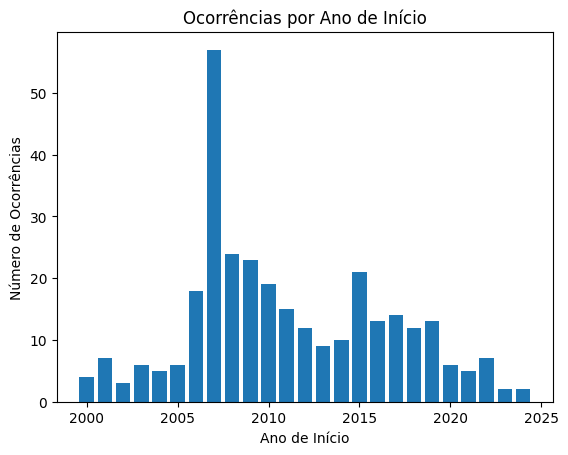

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que seu DataFrame se chama 'df'
df_ano = df.groupby('Start Year')['DisNo.'].count() # Contando o número de 'DisNo.' por 'Start Year'

plt.bar(df_ano.index, df_ano.values)
plt.xlabel("Ano de Início")
plt.ylabel("Número de Ocorrências")
plt.title("Ocorrências por Ano de Início")
plt.show()